In [1]:
import numpy as np
from keras import models, layers, optimizers
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from tensorflow.keras.utils import to_categorical
import pandas as pd
from sklearn import preprocessing
# Load the data
df=pd.read_csv("IMDB Dataset.csv")

2023-05-27 19:18:59.235057: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-27 19:18:59.373733: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-27 19:18:59.375079: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-27 19:19:00.928915: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
train_df = df.sample(frac=0.8, random_state=25)
test_df = df.drop(train_df.index)
print(train_df)
print(test_df)

                                                  review sentiment
13920  Kudos to Fawcett to taking on roles that, at t...  positive
23439  If you are a fan of early Duke movies, this Lo...  positive
11851  I'd love to give this movie a 10/10, but in it...  positive
8278   The credits at the end read "ALL directed by S...  negative
31258  This young filmmaker has a talent for capturin...  positive
...                                                  ...       ...
38608  I just got back from a screening a couple of h...  positive
48009  OK, I don't want to upset anyone who enjoyed t...  negative
9184   i just watched the movie i was afraid it's gon...  positive
49448  There are few films that leave me with the fee...  positive
11381  I watched this movie with my boyfriend, an avi...  negative

[40000 rows x 2 columns]
                                                  review sentiment
20     After the success of Die Hard and it's sequels...  positive
22     What an absolutely stunning m

In [3]:
# Tokenize the text data
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(train_df['review'].tolist())

# Convert the text data to sequences of integers
train_sequences = tokenizer.texts_to_sequences(train_df['review'].tolist())
test_sequences = tokenizer.texts_to_sequences(test_df['review'].tolist())

# Pad the sequences to a fixed length
max_length = 100
train_data = pad_sequences(train_sequences, maxlen=max_length)
test_data = pad_sequences(test_sequences, maxlen=max_length)

# Convert the labels to categorical
label_encoder = preprocessing.LabelEncoder()
train_labels= label_encoder.fit_transform(train_df['sentiment'])
#train_labels = to_categorical(train_df['sentiment'])


In [4]:
model = models.Sequential()
model.add(layers.Embedding(10000, 64, input_length=max_length))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))


In [5]:
 model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [6]:
history = model.fit(train_data, train_labels, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10


2023-05-27 19:19:25.290872: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 12800000 exceeds 10% of free system memory.


1000/1000 [==============================] - 20s 19ms/step - loss: 0.4191 - accuracy: 0.7967 - val_loss: 0.3259 - val_accuracy: 0.8569
Epoch 2/10
1000/1000 [==============================] - 23s 23ms/step - loss: 0.1666 - accuracy: 0.9388 - val_loss: 0.3973 - val_accuracy: 0.8466
Epoch 3/10
1000/1000 [==============================] - 18s 18ms/step - loss: 0.0333 - accuracy: 0.9911 - val_loss: 0.5584 - val_accuracy: 0.8434
Epoch 4/10
1000/1000 [==============================] - 18s 18ms/step - loss: 0.0078 - accuracy: 0.9985 - val_loss: 0.7103 - val_accuracy: 0.8450
Epoch 5/10
1000/1000 [==============================] - 18s 18ms/step - loss: 0.0039 - accuracy: 0.9991 - val_loss: 0.8176 - val_accuracy: 0.8434
Epoch 6/10
1000/1000 [==============================] - 18s 18ms/step - loss: 0.0057 - accuracy: 0.9983 - val_loss: 0.9078 - val_accuracy: 0.8366
Epoch 7/10
1000/1000 [==============================] - 18s 18ms/step - loss: 0.0111 - accuracy: 0.9962 - val_loss: 0.9899 - val_accura

In [7]:
test_labels= label_encoder.fit_transform(test_df['sentiment'])
print(test_labels[2])
#test_labels = to_categorical(test_df['sentiment'])
test_loss, test_acc = model.evaluate(test_data, test_labels)
print('Test accuracy:', test_acc)


0
313/313 [==============================] - 2s 5ms/step - loss: 1.1833 - accuracy: 0.8368
Test accuracy: 0.8367999792098999


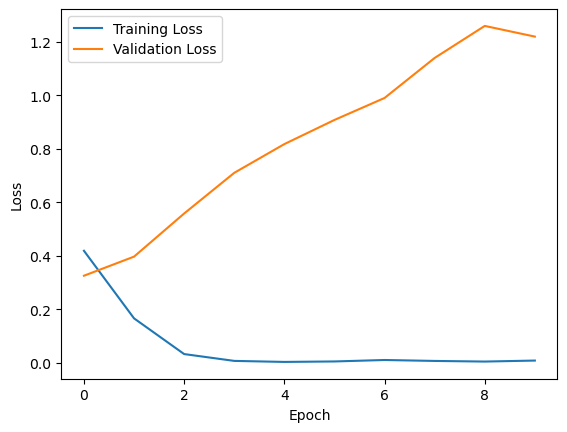

In [9]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


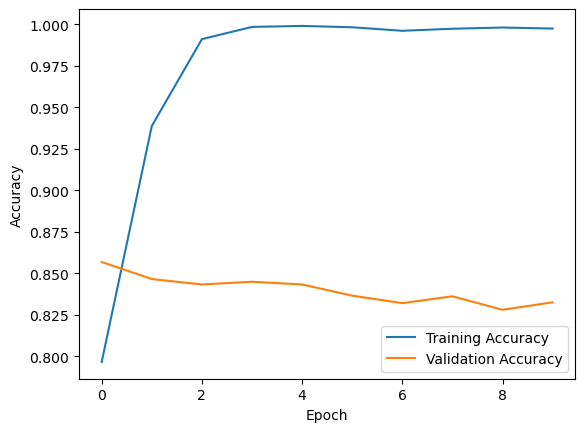

In [10]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [11]:
predictions = model.predict(test_data)

313/313 [==============================] - 1s 2ms/step


In [12]:
text = tokenizer.sequences_to_texts(test_data)

In [13]:
pred = np.zeros(len(predictions))
for i, score in enumerate(predictions):
    pred[i] = np.round(score)
    
predicted_sentiments = ['positive' if label == 1 else 'negative' for label in pred]    

In [14]:
print(f"Review text: {text[4]}\n")
print(f"Review : {predicted_sentiments[4]}")


Review text: average and surprisingly tame fulci giallo which means it's still quite bad by normal standards but by its solid build up and some nice touches such as a neat time twist on the issues of visions and br br the well known weaknesses are in full gear banal dialogue wooden acting illogical plot points and the finale goes on much too long while the denouement proves to be a rather lame or shall i say limp affair br br fulci's ironic handling of giallo is amusing though yellow clues wherever you look br br 3 out of 10 killers

Review : positive
